#### transfer learning
training dinasour images to vgg16 imagenet

In [1]:
%pip install kaggle

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d larserikrisholm/dinosaur-image-dataset-15-species

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/larserikrisholm/dinosaur-image-dataset-15-species
License(s): apache-2.0
 99% 457M/462M [00:04<00:00, 104MB/s]
100% 462M/462M [00:04<00:00, 100MB/s]


In [2]:
import zipfile
with zipfile.ZipFile("dinosaur-image-dataset-15-species.zip", "r") as zip_ref:
    zip_ref.extractall(".")

In [3]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from keras.applications.vgg16 import VGG16

In [4]:
conv_base = VGG16(weights='imagenet',
                  include_top=False, #dont include fully connected layers, include only convolutional layers
                  input_shape=(224, 224, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [28]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [29]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(15, activation='softmax'))

In [30]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 15)                  │           3,855 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,141,327 (80.65 MB)

 Trainable params: 6,426,639 (24.52 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [31]:
conv_base.trainable = False #freeze the convolutional base

In [32]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 15)                  │           3,855 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,141,327 (80.65 MB)

 Trainable params: 6,426,639 (24.52 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [33]:
import os
import shutil
import random

# Define paths
dataset_dir = 'dinosaur_dataset'
output_dir = 'dinosaur_dataset_splits'

train_dir = os.path.join(output_dir, 'train')
val_dir = os.path.join(output_dir, 'val')
test_dir = os.path.join(output_dir, 'test')

# Create output directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Get list of species (subfolders)
species = [d for d in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, d))]

# Split images
for specie in species:
    specie_dir = os.path.join(dataset_dir, specie)
    images = os.listdir(specie_dir)
    random.shuffle(images)

    train_split = int(0.6 * len(images))
    val_split = int(0.2 * len(images)) + train_split

    train_images = images[:train_split]
    val_images = images[train_split:val_split]
    test_images = images[val_split:]

    # Create subfolders in train, val, and test directories
    os.makedirs(os.path.join(train_dir, specie), exist_ok=True)
    os.makedirs(os.path.join(val_dir, specie), exist_ok=True)
    os.makedirs(os.path.join(test_dir, specie), exist_ok=True)

    # Copy images to respective directories
    for img in train_images:
        shutil.copy(os.path.join(specie_dir, img), os.path.join(train_dir, specie, img))

    for img in val_images:
        shutil.copy(os.path.join(specie_dir, img), os.path.join(val_dir, specie, img))

    for img in test_images:
        shutil.copy(os.path.join(specie_dir, img), os.path.join(test_dir, specie, img))

print("Dataset split into train, validation, and test sets.")

Dataset split into train, validation, and test sets.


In [34]:
train_ds = keras.utils.image_dataset_from_directory(
    directory="dinosaur_dataset_splits/train",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(224, 224),
)

Found 2032 files belonging to 15 classes.


In [35]:
validation_ds = keras.utils.image_dataset_from_directory(
    directory="dinosaur_dataset_splits/test",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(224, 224),
)

Found 884 files belonging to 15 classes.


In [36]:
def process(image,label):
    image = tensorflow.cast(image/255. , tensorflow.float32)
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [37]:
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [38]:
history = model.fit(train_ds, validation_data=validation_ds, epochs=10)

Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 45s 652ms/step - accuracy: 0.1856 - loss: 4.3098 - val_accuracy: 0.5871 - val_loss: 1.3526
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 63s 385ms/step - accuracy: 0.7146 - loss: 1.0494 - val_accuracy: 0.8100 - val_loss: 0.8081
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 21s 323ms/step - accuracy: 0.8864 - loss: 0.5627 - val_accuracy: 0.8722 - val_loss: 0.5622
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 20s 318ms/step - accuracy: 0.9578 - loss: 0.2945 - val_accuracy: 0.8812 - val_loss: 0.4805
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 21s 325ms/step - accuracy: 0.9930 - loss: 0.1506 - val_accuracy: 0.8925 - val_loss: 0.4106
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 21s 320ms/step - accuracy: 0.9967 - loss: 0.0938 - val_accuracy: 0.8993 - val_loss: 0.3926
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 40s 310ms/step - accuracy: 0.9982 - loss: 0.0572 - val_accuracy: 0.9005 - val_loss: 0.3784
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 21s 322ms/step - accuracy: 1.0000 - loss: 0.0366 - val_accu

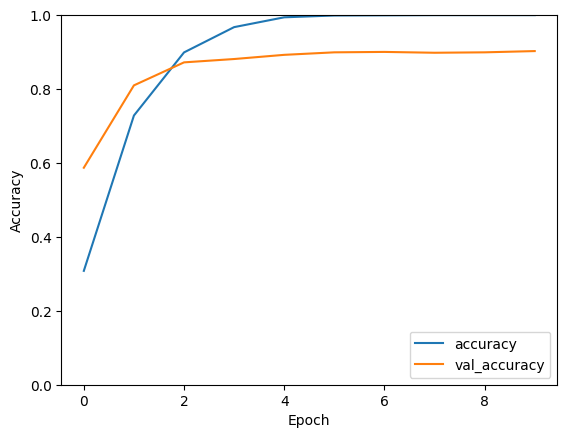

In [39]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

### model is overfitted, thus doing data augmentation; to train on varied data

In [40]:
from keras.preprocessing.image import load_img, array_to_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [41]:
batch_size = 32

In [42]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [43]:
train_generator = train_datagen.flow_from_directory(
    'dinosaur_dataset_splits/train',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 2032 images belonging to 15 classes.


In [44]:
def process(image,label):
    image = tensorflow.cast(image/255. , tensorflow.float32)
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


In [45]:
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [46]:
history=model.fit(train_ds, validation_data=validation_ds, epochs=10)

Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 25s 333ms/step - accuracy: 0.0680 - loss: 3.1358 - val_accuracy: 0.0645 - val_loss: 2.9902
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 24s 381ms/step - accuracy: 0.0645 - loss: 2.9618 - val_accuracy: 0.0679 - val_loss: 2.9154
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 25s 383ms/step - accuracy: 0.0651 - loss: 2.8457 - val_accuracy: 0.0713 - val_loss: 2.7834
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 20s 310ms/step - accuracy: 0.0870 - loss: 2.8151 - val_accuracy: 0.0713 - val_loss: 2.7812
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 25s 377ms/step - accuracy: 0.0781 - loss: 2.7454 - val_accuracy: 0.0724 - val_loss: 2.7079
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 25s 396ms/step - accuracy: 0.0569 - loss: 2.7080 - val_accuracy: 0.0724 - val_loss: 2.7077
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 20s 311ms/step - accuracy: 0.0717 - loss: 2.7078 - val_accuracy: 0.0724 - val_loss: 2.7076
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 21s 316ms/step - accuracy: 0.0726 - loss: 2.7078 - val_accu

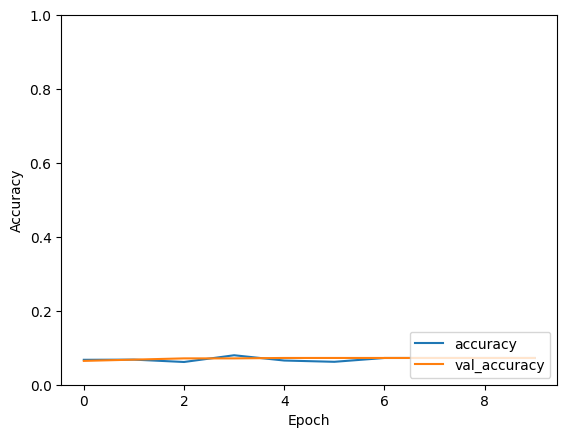

In [47]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()